# Project: Investigating a dataset - TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
    <li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this report, a data set containing information about 10,000 movies collected from The Movie Database (TMDb) will be analyzed. Using python, numpy and pandas, tools that were taught in the Udacity Data Analysis course will be used to analyze this dataset.

This dataset contains information collected from TMDb, which includes an exhaustive list of movies. Corresponding to these movies are numeric datasets that include the budget, revenue, user ratings, vote counts, vote average; and aswell contains informations about the movies themselves which include cast, director, genres, original title, homepage and other similar information. The movie dataset spans movies from 1960 to 2015.

This particular analysis will investigate two key questions.

>1. What movie properties affect movie revenue?
 * Various independent variables will be investigated to see their impact on the revenue
 * These could include user ratings, vote average, vote count, budget, etc.
>2. How has movie genre changed from year to year?
 * The genres will be split and aggregated to see their change year to year.


In [60]:
#This cell includes all the packages that are planned to be used for this project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section, several functions will be used to get a general overview of the data, how it can changed or filtered to prepare it for a proper analysis.

In [61]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [62]:
df.shape

(10866, 21)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [64]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [65]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

<a id='cleaning'></a>
## Data Cleaning

### Data Cleaning - How has movie genre changed from year to year?


>This section will consist of cleaning up the data to prepare for visualization. In the first part of the data cleaning process, I am preparing to separate the genre column into individual genres as the genre column is categorized into several genres that are separated by pipe ("|") strings. My methodology was to split the genres, and create a new dataframe ("df_genres") so I can visualize how the genres change per release year overtime to see if there are any evident trends.



In [66]:
df['genres'].isnull().sum()

23

In [67]:
df[df.genres.isnull()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,363869,tt4835298,0.244648,0,0,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,NaN,Guido Chiesa,NaN,...,"Italian remake of the Mexican 2013 hit, ""We th...",100,NaN,NaN,10/29/15,21,6.1,2015,0.00000,0.0
620,361043,tt5022680,0.129696,0,0,All Hallows' Eve 2,NaN,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,NaN,...,A woman finds a VHS tape on her doorstep that ...,90,NaN,Ruthless Pictures|Hollywood Shorts,10/6/15,13,5.0,2015,0.00000,0.0
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,NaN,Steward Lee|Steven G. Lee,NaN,...,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,NaN,10/3/14,13,6.8,2014,0.00000,0.0
1712,21634,tt1073510,0.302095,0,0,Prayers for Bobby,Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...,http://www.prayersforbobby.com/,Russell Mulcahy,"Before you echo ""amen"" in your home and place ...",...,"True story of Mary Griffith, gay rights crusad...",88,NaN,Daniel Sladek Entertainment,2/27/09,57,7.4,2009,0.00000,0.0
1897,40534,tt1229827,0.020701,0,0,Jonas Brothers: The Concert Experience,Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Ta...,NaN,Bruce Hendricks,NaN,...,Secure your VIP pass to a once-in-a-lifetime e...,76,NaN,NaN,2/27/09,11,7.0,2009,0.00000,0.0
2370,127717,tt1525359,0.081892,0,0,Freshman Father,Britt Irvin|Merrilyn Gann|Barbara Tyson|Anthon...,NaN,Michael Scott,NaN,...,NaN,0,NaN,NaN,6/5/10,12,5.8,2010,0.00000,0.0
2376,315620,tt1672218,0.068411,0,0,Doctor Who: A Christmas Carol,Matt Smith|Karen Gillan|Arthur Darvill|Michael...,NaN,NaN,NaN,...,Amy Pond and Rory Williams are trapped on a cr...,62,NaN,NaN,12/25/10,11,7.7,2010,0.00000,0.0
2853,57892,tt0270053,0.130018,0,0,Vizontele,YÄ±lmaz ErdoÄŸan|Demet Akbag|Altan Erkekli|Cem...,NaN,YÄ±lmaz ErdoÄŸan,NaN,...,The story takes place in a small town (called ...,110,NaN,NaN,2/2/01,12,7.2,2001,0.00000,0.0
3279,54330,tt1720044,0.145331,0,0,ì•„ê¸°ì™€ ë‚˜,Jang Keun-suk|Song Ha-yoon|Kim Jeong-Nan,NaN,Kim Jin-Yeong,NaN,...,Joon-soo (Jang Geun -Seok) is a rebellious hig...,96,NaN,NaN,8/13/08,11,6.1,2008,0.00000,0.0
4547,123024,tt2305700,0.520520,0,0,London 2012 Olympic Opening Ceremony: Isles of...,Queen Elizabeth II|Mike Oldfield|Kenneth Brana...,http://www.london2012.com/,Danny Boyle,Inspire a generation.,...,The London 2012 Olympic Games Opening Ceremony...,220,NaN,BBC,7/27/12,12,8.3,2012,0.00000,0.0


In [68]:
df.dropna(subset = ['genres'], inplace = True)

In [69]:
df1 = df['genres'].str.split('|',expand=True)

In [70]:
df2 = df.copy()

In [71]:
df_genres = pd.concat([df, df1], axis = 1, join_axes =[df.index])
df_genres.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,vote_count,vote_average,release_year,budget_adj,revenue_adj,0,1,2,3,4
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,None
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure,Science Fiction,Thriller,None
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Science Fiction,Thriller,None,None
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Adventure,Science Fiction,Fantasy,None
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Crime,Thriller,None,None


In [72]:
df_genres = df_genres.rename(columns = {0:'genre1',1:'genre2',2:'genre3',3:'genre4',4:'genre5'})

In [73]:
df_genres.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre1,genre2,genre3,genre4,genre5
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,None
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure,Science Fiction,Thriller,None
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Science Fiction,Thriller,None,None
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Adventure,Science Fiction,Fantasy,None
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Crime,Thriller,None,None


In [74]:
df_genres['genre1'].value_counts()

Drama              2453
Comedy             2319
Action             1590
Horror              915
Adventure           586
Thriller            491
Documentary         432
Animation           403
Crime               381
Fantasy             272
Science Fiction     214
Romance             186
Family              144
Mystery             125
Music               100
TV Movie             78
War                  59
History              44
Western              42
Foreign               9
Name: genre1, dtype: int64

> To get each genre column into one, I chose to append the genres after renaming the split columns using ths strsplit function, so that the resulting dataset would consist of only the release year and genre.

In [75]:
genre1 = df_genres[['release_year','genre1']]
genre2 = df_genres[['release_year','genre2']]
genre3 = df_genres[['release_year','genre3']]
genre4 = df_genres[['release_year','genre4']]
genre5 = df_genres[['release_year','genre5']]

genre2 = genre2.rename(columns = {'genre2':'genre1'})
genre3 = genre3.rename(columns = {'genre3':'genre1'})
genre4 = genre4.rename(columns = {'genre4':'genre1'})
genre5 = genre5.rename(columns = {'genre5':'genre1'})

In [76]:
df_genres['genre1'].value_counts()

Drama              2453
Comedy             2319
Action             1590
Horror              915
Adventure           586
Thriller            491
Documentary         432
Animation           403
Crime               381
Fantasy             272
Science Fiction     214
Romance             186
Family              144
Mystery             125
Music               100
TV Movie             78
War                  59
History              44
Western              42
Foreign               9
Name: genre1, dtype: int64

In [77]:
df_genres = genre1.append(genre2)
df_genres = df_genres.append(genre3)
df_genres = df_genres.append(genre4)
df_genres = df_genres.append(genre5)

In [78]:
df_genres.shape

(54215, 2)

In [79]:
df_genres.head()

,release_year,genre1
0,2015,Action
1,2015,Action
2,2015,Adventure
3,2015,Action
4,2015,Action


> With all of the genres in one dataframe with only two columns, "release_year" and "genre1", we now have a full collection of all of the genres that appear each year sorted by the release_year.

>Using the groupby function and value_counts, I used unstack() to separate all of the genres by type and tally them depending on the year to make it easier to visualize each genre separately in the next section. Since there was a trend of genres increasing to their max value in the latter years towards 2015, I sorted the data columns by the 2015 final values so it would be plotted properly later.


In [80]:
df_genres = df_genres.groupby('release_year')['genre1'].value_counts().unstack().fillna(0)

In [81]:
df_genres.max()

genre1
Action             129.0
Adventure           72.0
Animation           50.0
Comedy             198.0
Crime               71.0
Documentary         73.0
Drama              284.0
Family              72.0
Fantasy             49.0
Foreign             18.0
History             24.0
Horror             125.0
Music               33.0
Mystery             51.0
Romance             85.0
Science Fiction     86.0
TV Movie            20.0
Thriller           179.0
War                 23.0
Western              8.0
dtype: float64

In [82]:
df_genres.stack().idxmax(axis = 1)

(2014, 'Drama')

In [83]:
df_genres.head()

genre1,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,
1960,8.0,5.0,0.0,8.0,2.0,0.0,13.0,3.0,2.0,1.0,5.0,7.0,1.0,0.0,6.0,3.0,0.0,6.0,2.0,6.0
1961,7.0,6.0,1.0,10.0,2.0,0.0,16.0,5.0,2.0,1.0,3.0,3.0,2.0,1.0,7.0,4.0,0.0,0.0,2.0,3.0
1962,8.0,7.0,0.0,5.0,3.0,0.0,21.0,2.0,1.0,1.0,4.0,5.0,1.0,4.0,5.0,2.0,0.0,7.0,3.0,3.0
1963,4.0,7.0,1.0,13.0,4.0,0.0,13.0,3.0,2.0,2.0,4.0,9.0,0.0,6.0,8.0,2.0,0.0,10.0,1.0,2.0
1964,5.0,5.0,2.0,16.0,10.0,0.0,20.0,4.0,4.0,1.0,3.0,6.0,5.0,4.0,9.0,4.0,0.0,9.0,3.0,1.0


In [84]:
df_genres.tail()

genre1,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,
2011,115.0,62.0,46.0,172.0,48.0,49.0,214.0,72.0,46.0,14.0,8.0,78.0,17.0,38.0,75.0,56.0,10.0,146.0,9.0,3.0
2012,99.0,50.0,40.0,176.0,54.0,49.0,232.0,42.0,34.0,6.0,13.0,104.0,22.0,33.0,79.0,54.0,14.0,160.0,10.0,4.0
2013,121.0,67.0,42.0,175.0,71.0,62.0,253.0,48.0,39.0,0.0,14.0,102.0,30.0,38.0,65.0,61.0,10.0,175.0,7.0,3.0
2014,129.0,67.0,36.0,185.0,65.0,73.0,284.0,43.0,36.0,0.0,15.0,105.0,28.0,36.0,84.0,62.0,14.0,179.0,23.0,6.0
2015,107.0,69.0,39.0,162.0,51.0,57.0,260.0,44.0,33.0,0.0,15.0,125.0,33.0,42.0,57.0,86.0,20.0,171.0,9.0,6.0


In [85]:
df_genres.sort_values(df_genres.index[-1],axis=1,ascending = False, inplace = True)

In [86]:
df_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 1960 to 2015
Data columns (total 20 columns):
Drama              56 non-null float64
Thriller           56 non-null float64
Comedy             56 non-null float64
Horror             56 non-null float64
Action             56 non-null float64
Science Fiction    56 non-null float64
Adventure          56 non-null float64
Documentary        56 non-null float64
Romance            56 non-null float64
Crime              56 non-null float64
Family             56 non-null float64
Mystery            56 non-null float64
Animation          56 non-null float64
Fantasy            56 non-null float64
Music              56 non-null float64
TV Movie           56 non-null float64
History            56 non-null float64
War                56 non-null float64
Western            56 non-null float64
Foreign            56 non-null float64
dtypes: float64(20)
memory usage: 11.7 KB


### Data Cleaning -  What movie properties affect movie revenue?

> For this section I took the original dataframe and dropped some columns that were not adding value to the analysis, these columns included tagline, homepage, overview, imdb_id, cast, director, keywords, production companies and genres (which was analzed separately above). I decided to focus on numeric factors that could affect the movie revenues as the independent variables.

In [87]:
df_num= df.drop(['id','cast','director','keywords','genres','production_companies','tagline', 'homepage','overview','imdb_id'], axis = 1)

In [88]:
df_num.head(20)

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,119,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,137,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,9.110700,135000000,532950503,The Revenant,156,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,8.654359,155000000,440603537,Terminator Genisys,125,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,7.667400,108000000,595380321,The Martian,141,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,7.404165,74000000,1156730962,Minions,91,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,6.326804,175000000,853708609,Inside Out,94,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08


> The remaining columns now have uniform non-null values

In [89]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 11 columns):
popularity        10843 non-null float64
budget            10843 non-null int64
revenue           10843 non-null int64
original_title    10843 non-null object
runtime           10843 non-null int64
release_date      10843 non-null object
vote_count        10843 non-null int64
vote_average      10843 non-null float64
release_year      10843 non-null int64
budget_adj        10843 non-null float64
revenue_adj       10843 non-null float64
dtypes: float64(4), int64(5), object(2)
memory usage: 1016.5+ KB


In [90]:
df_num.mean()

popularity      6.474559e-01
budget          1.465672e+07
revenue         3.990779e+07
runtime         1.021375e+02
vote_count      2.178137e+02
vote_average    5.973974e+00
release_year    2.001316e+03
budget_adj      1.758827e+07
revenue_adj     5.147332e+07
dtype: float64

In [91]:
df_num.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10843.000000,1.084300e+04,1.084300e+04,10843.000000,10843.000000,10843.000000,10843.000000,1.084300e+04,1.084300e+04
mean,0.647456,1.465672e+07,3.990779e+07,102.137508,217.813705,5.973974,2001.315595,1.758827e+07,5.147332e+07
std,1.000986,3.093864e+07,1.171131e+08,31.293320,576.155351,0.934260,12.813298,3.433299e+07,1.447664e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.208253,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.384555,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.715349,1.500000e+07,2.413675e+07,111.000000,146.000000,6.600000,2011.000000,2.093530e+07,3.387655e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


>From describe it seems, there are significant amounts of budget and revenue entries set as zero in the dataset. The assumption I made here is that the zero entries are missing points, as the Kaggle page hints at this, and it does not seem logical for a movie project not to have a budget or any revenue as a valid entry that would produce a real movie.

>Instead of removing these values completely, I replaced the 0 values were replaced as NaN so the other data in other columns can be used in my analysis without skewing the data.

In [92]:
df_num.query('revenue == 0').shape


(5993, 11)

In [93]:
df_num.query('budget == 0').shape

(5674, 11)

In [94]:
df_num.query('popularity == 0 ').shape

(0, 11)

In [95]:
df_num['revenue'] = df_num['revenue'].replace(0, np.nan)
df_num['budget'] = df_num['budget'].replace(0, np.nan)
df_num['budget_adj'] = df_num['budget_adj'].replace(0, np.nan)
df_num['revenue_adj'] = df_num['revenue_adj'].replace(0, np.nan)

In [96]:
df_num.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10843.000000,5.169000e+03,4.850000e+03,10843.000000,10843.000000,10843.000000,10843.000000,5.169000e+03,4.850000e+03
mean,0.647456,3.074538e+07,8.922066e+07,102.137508,217.813705,5.973974,2001.315595,3.689487e+07,1.150774e+08
std,1.000986,3.890207e+07,1.620684e+08,31.293320,576.155351,0.934260,12.813298,4.195793e+07,1.988419e+08
min,0.000065,1.000000e+00,2.000000e+00,0.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,0.208253,6.000000e+06,7.708081e+06,90.000000,17.000000,5.400000,1995.000000,8.102293e+06,1.046262e+07
50%,0.384555,1.700000e+07,3.182654e+07,99.000000,38.000000,6.000000,2006.000000,2.273036e+07,4.392749e+07
75%,0.715349,4.000000e+07,9.991823e+07,111.000000,146.000000,6.600000,2011.000000,5.008384e+07,1.315644e+08
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> To easily analyze the ranges of the budget, revenue and popularity, I split them into bins using the five factors as ranges.

In [97]:
bin_edges_bud = [1e+00, 6e+06, 1.7e+07, 4.0e+07, 4.25e+08]

In [98]:
bin_edges_rev = [2e+00, 7.708081e+06, 3.182654e+07, 9.991823e+07, 2.781506e+09]

In [99]:
bin_edges_pop= [0.000065,0.208253,0.384555,0.715349,32.985763]

In [100]:
bin_names = [ 'Low','Medium' , 'Moderately High' , 'High']

In [101]:
df_num['popularity_levels'] = pd.cut(df_num['popularity'], bin_edges_pop, labels = bin_names)
df_num

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,popularity_levels
0,32.985763,150000000.0,1.513529e+09,Jurassic World,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,High
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,High
2,13.112507,110000000.0,2.952382e+08,Insurgent,119,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,High
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,High
4,9.335014,190000000.0,1.506249e+09,Furious 7,137,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,High
5,9.110700,135000000.0,5.329505e+08,The Revenant,156,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08,High
6,8.654359,155000000.0,4.406035e+08,Terminator Genisys,125,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08,High
7,7.667400,108000000.0,5.953803e+08,The Martian,141,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08,High
8,7.404165,74000000.0,1.156731e+09,Minions,91,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09,High
9,6.326804,175000000.0,8.537086e+08,Inside Out,94,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08,High


In [102]:
df_num.groupby('popularity_levels').mean()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
popularity_levels,,,,,,,,,
Low,0.118803,9.759926e+06,1.668962e+07,97.660273,26.941350,5.898451,2000.838067,1.398720e+07,2.841144e+07
Medium,0.290713,1.432476e+07,1.858088e+07,99.897417,38.045387,5.805572,2000.395203,1.954536e+07,3.198564e+07
Moderately High,0.521315,2.090764e+07,3.621895e+07,102.594246,92.260789,5.909996,2000.814828,2.703820e+07,5.383618e+07
High,1.658860,4.853928e+07,1.565039e+08,108.397270,713.940981,6.281815,2003.213943,5.555421e+07,1.938379e+08


In [103]:
df_num['revenue_levels'] = pd.cut(df_num['revenue'], bin_edges_rev, labels = bin_names)
df_num

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,popularity_levels,revenue_levels
0,32.985763,150000000.0,1.513529e+09,Jurassic World,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,High,High
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,High,High
2,13.112507,110000000.0,2.952382e+08,Insurgent,119,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,High,High
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,High,High
4,9.335014,190000000.0,1.506249e+09,Furious 7,137,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,High,High
5,9.110700,135000000.0,5.329505e+08,The Revenant,156,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08,High,High
6,8.654359,155000000.0,4.406035e+08,Terminator Genisys,125,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08,High,High
7,7.667400,108000000.0,5.953803e+08,The Martian,141,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08,High,High
8,7.404165,74000000.0,1.156731e+09,Minions,91,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09,High,High
9,6.326804,175000000.0,8.537086e+08,Inside Out,94,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08,High,High


<a id='eda'></a>
## Exploratory Data Analysis

### Exploratory Data Analysis 1 - What movie properties affect movie revenue?

In [104]:
df_num.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10843.000000,5.169000e+03,4.850000e+03,10843.000000,10843.000000,10843.000000,10843.000000,5.169000e+03,4.850000e+03
mean,0.647456,3.074538e+07,8.922066e+07,102.137508,217.813705,5.973974,2001.315595,3.689487e+07,1.150774e+08
std,1.000986,3.890207e+07,1.620684e+08,31.293320,576.155351,0.934260,12.813298,4.195793e+07,1.988419e+08
min,0.000065,1.000000e+00,2.000000e+00,0.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,0.208253,6.000000e+06,7.708081e+06,90.000000,17.000000,5.400000,1995.000000,8.102293e+06,1.046262e+07
50%,0.384555,1.700000e+07,3.182654e+07,99.000000,38.000000,6.000000,2006.000000,2.273036e+07,4.392749e+07
75%,0.715349,4.000000e+07,9.991823e+07,111.000000,146.000000,6.600000,2011.000000,5.008384e+07,1.315644e+08
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [105]:
df_num.groupby('revenue_levels').mean()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
revenue_levels,,,,,,,,,
Low,0.471612,9.732850e+06,2.310640e+06,101.668043,86.254335,6.023617,2003.213047,1.224331e+07,3.621183e+06
Medium,0.630096,2.014129e+07,1.817794e+07,105.997525,148.457921,6.029373,1997.372937,2.713923e+07,2.991584e+07
Moderately High,0.969160,3.086560e+07,5.853540e+07,108.917492,330.608911,6.167162,2000.050330,3.863762e+07,8.618679e+07
High,2.109104,7.193138e+07,2.777786e+08,115.287716,1179.156636,6.373866,2003.053586,8.091069e+07,3.404976e+08


Using the describe function, I want to get a general overview of the distribution in properties. Using the histogram function I want to look at the general range of values in most of the types of properties I am investigating.

Based on the revenue_levels that were grouped in the last section, we can see a general trend of increasing revenue with the budget_adj, vote_count and popularity. For these three the 'High' revenue_level shows much larger values in these properties. 

The vote_average, runtime, and release_year although show larger values in the 'High' revenue_level, their from the Low bin to the High bin are only marginal and are not expected to be a huge impact on the revenue. 

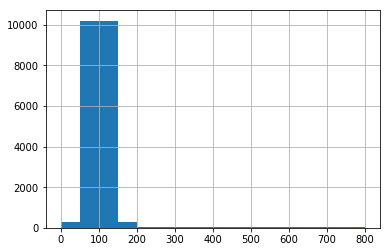

In [106]:
df_num['runtime'].hist(bins = [0,50,150,200,250,800])


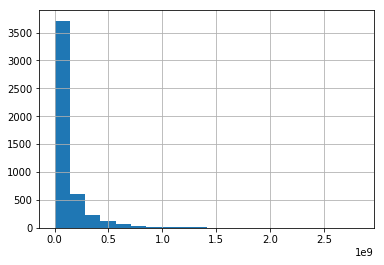

In [107]:
df_num['revenue_adj'].hist(bins = 20)

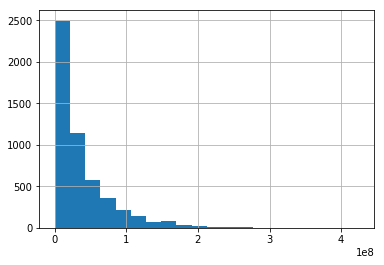

In [108]:
df_num['budget_adj'].hist(bins = 20)

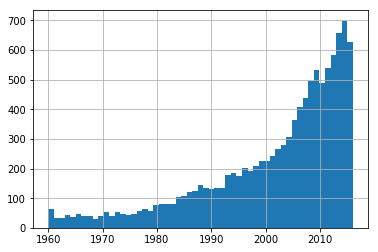

In [109]:
df_num['release_year'].hist(bins = (2015-1960), range =(1960,2016));

It should be noted as we move into the latter decades, significantly more movies were released per year and this trend is expected to continue.

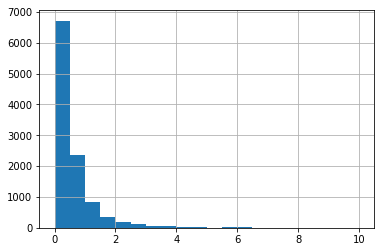

In [110]:
df_num['popularity'].hist(bins = 20, range = (0,10));

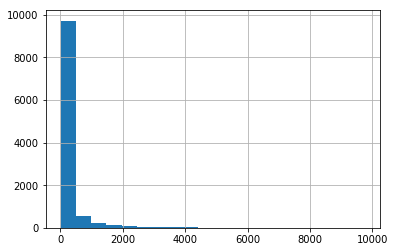

In [111]:
df_num['vote_count'].hist(bins = 20);

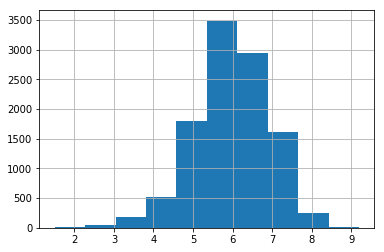

In [112]:
df_num['vote_average'].hist();

Based on the historgrams we can get an idea on the general range of each movie property affecting revenue. 

For release year, as we move into the latter decades significantly more movies were released per year and this trend is expected to continue.

The vote average shows many movies were voted between 5 to 7 as a rating, which is likely considered an average movie.

Based on runtime, most movies seem to range between 75 to 125 minutes in length, with a smaller portion being between 125 to 150 minutes.

The remaining four properties:revenue_adj, vote_count, popularity and budget_adj all show a similar right skewed distribution.

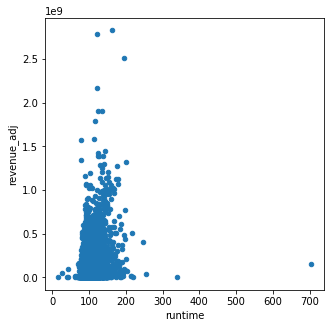

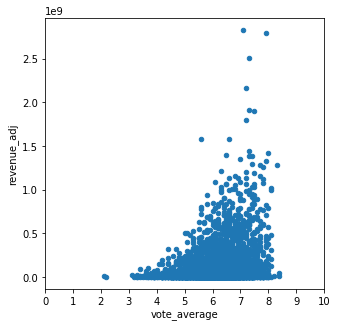

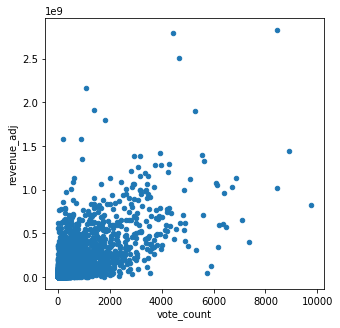

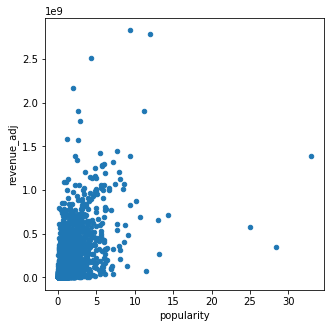

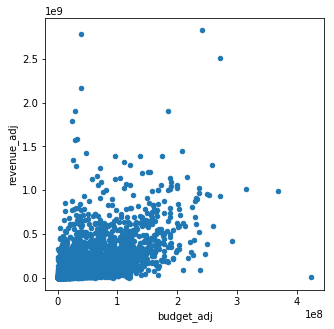

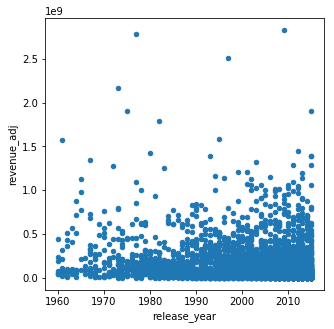

In [113]:
df_num.plot(x = 'runtime', y = 'revenue_adj', kind = 'scatter', figsize =(5,5))
df_num.plot(x = 'vote_average', y = 'revenue_adj', kind = 'scatter', figsize =(5,5), xticks = range(0,11))
df_num.plot(x = 'vote_count', y = 'revenue_adj', kind = 'scatter', figsize =(5,5))
df_num.plot(x = 'popularity', y = 'revenue_adj', kind = 'scatter', figsize =(5,5))
df_num.plot(x = 'budget_adj', y = 'revenue_adj', kind = 'scatter', figsize =(5,5));
df_num.plot(x = 'release_year', y = 'revenue_adj', kind = 'scatter', figsize =(5,5));

By plotting all six of these variables against revenue_adj, the clearest trends show that the runtime favours movies that are within a specific range of 75 to 125 minutes in terms of runtime. Vote_average also shows that most high revenue movies having an vote_average above 6.0

Although release_year seems to show a trend of increasing revenue with a latter release_date, this is likely just a bi-product of significantly more movies being released in the latter years.

For the remaining three variables, budget_adj, vote_count and popularity, I plotted these variables against revenue_adj split by their 50% distribution from the describe function to see if there is a significant difference from low and high vote_count, popularity and budgets.


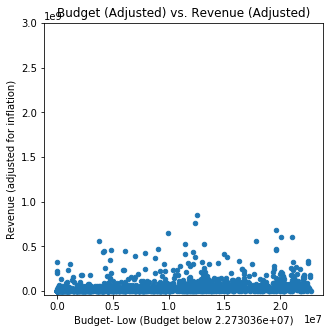

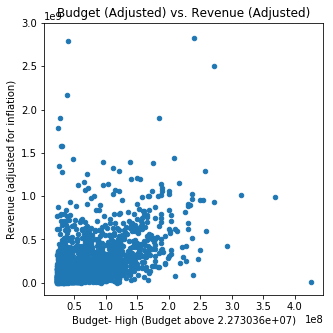

In [114]:
df_num_bud_adj_low = df_num.query('budget_adj < 2.273036e+07')
df_num_bud_adj_high = df_num.query('budget_adj > 2.273036e+07')
ytick = [0.0,0.5e9,1e9,1.5e9,2.0e9,2.5e9, 3.0e9]
df_num_bud_adj_low.plot (x = 'budget_adj', y = 'revenue_adj', kind = 'scatter', figsize = (5,5), yticks = ytick)
plt.title('Budget (Adjusted) vs. Revenue (Adjusted)')
plt.xlabel('Budget- Low (Budget below 2.273036e+07)')
plt.ylabel('Revenue (adjusted for inflation)')
df_num_bud_adj_high.plot (x = 'budget_adj', y = 'revenue_adj', kind = 'scatter', figsize = (5,5), yticks = ytick)
plt.title('Budget (Adjusted) vs. Revenue (Adjusted)')
plt.xlabel('Budget- High (Budget above 2.273036e+07)')
plt.ylabel('Revenue (adjusted for inflation)');

Text(0,0.5,'Revenue (adjusted for inflation)')

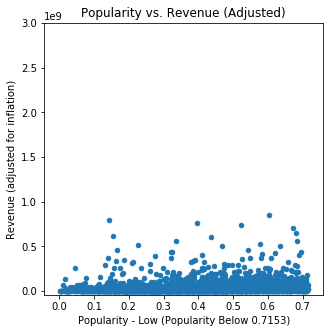

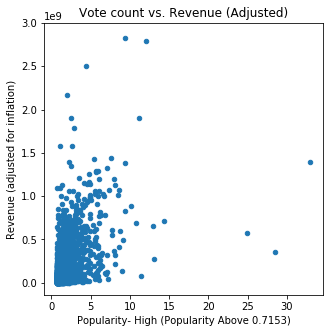

In [115]:
df_num_pop_low = df_num.query('popularity < 0.7153')
df_num_pop_high = df_num.query('popularity >0.7153')
ytick = [0.0,0.5e9,1e9,1.5e9,2.0e9,2.5e9, 3.0e9]
df_num_pop_low.plot( x = 'popularity', y = 'revenue_adj', kind = 'scatter', figsize = (5,5), yticks = ytick)
plt.title('Popularity vs. Revenue (Adjusted)')
plt.xlabel('Popularity - Low (Popularity Below 0.7153)')
plt.ylabel('Revenue (adjusted for inflation)')
df_num_pop_high.plot( x = 'popularity', y = 'revenue_adj', kind = 'scatter', figsize = (5,5), yticks = ytick);
plt.title('Vote count vs. Revenue (Adjusted)')
plt.xlabel('Popularity- High (Popularity Above 0.7153)')
plt.ylabel('Revenue (adjusted for inflation)')


Text(0,0.5,'Revenue (adjusted for inflation)')

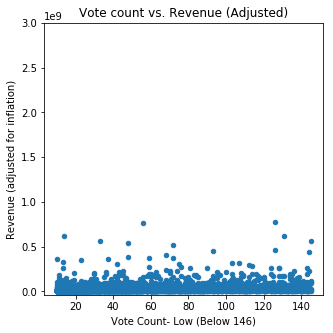

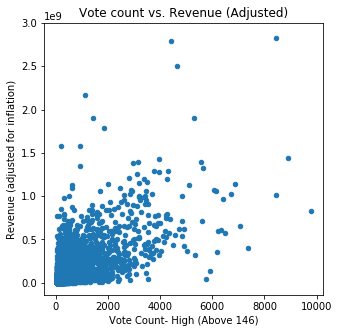

In [116]:
df_num_vote_count_low = df_num.query('vote_count < 146')
df_num_vote_count_high = df_num.query('vote_count > 38')
ytick = [0.0,0.5e9,1e9,1.5e9,2.0e9,2.5e9, 3.0e9]
df_num_vote_count_low.plot( x = 'vote_count', y = 'revenue_adj', kind = 'scatter', figsize = (5,5), yticks = ytick )
plt.title('Vote count vs. Revenue (Adjusted)')
plt.xlabel('Vote Count- Low (Below 146)')
plt.ylabel('Revenue (adjusted for inflation)')
df_num_vote_count_high.plot( x = 'vote_count', y = 'revenue_adj', kind = 'scatter', figsize = (5,5), yticks=ytick);
plt.title('Vote count vs. Revenue (Adjusted)')
plt.xlabel('Vote Count- High (Above 146)')
plt.ylabel('Revenue (adjusted for inflation)')

### Exploratory Data Analysis 2 - How has movie genre popularity changed over the years?

For this question I decided to plot the genres by release year to see any trends. Before plotting the graphs themselves, I split the release_years in decades to see what genre dominated over the years as the most and least popular.

In [117]:
df_genres.head()

genre1,Drama,Thriller,Comedy,Horror,Action,Science Fiction,Adventure,Documentary,Romance,Crime,Family,Mystery,Animation,Fantasy,Music,TV Movie,History,War,Western,Foreign
release_year,,,,,,,,,,,,,,,,,,,,
1960,13.0,6.0,8.0,7.0,8.0,3.0,5.0,0.0,6.0,2.0,3.0,0.0,0.0,2.0,1.0,0.0,5.0,2.0,6.0,1.0
1961,16.0,0.0,10.0,3.0,7.0,4.0,6.0,0.0,7.0,2.0,5.0,1.0,1.0,2.0,2.0,0.0,3.0,2.0,3.0,1.0
1962,21.0,7.0,5.0,5.0,8.0,2.0,7.0,0.0,5.0,3.0,2.0,4.0,0.0,1.0,1.0,0.0,4.0,3.0,3.0,1.0
1963,13.0,10.0,13.0,9.0,4.0,2.0,7.0,0.0,8.0,4.0,3.0,6.0,1.0,2.0,0.0,0.0,4.0,1.0,2.0,2.0
1964,20.0,9.0,16.0,6.0,5.0,4.0,5.0,0.0,9.0,10.0,4.0,4.0,2.0,4.0,5.0,0.0,3.0,3.0,1.0,1.0


In [118]:
df_genres.sum()

genre1
Drama              4761.0
Thriller           2908.0
Comedy             3793.0
Horror             1637.0
Action             2385.0
Science Fiction    1230.0
Adventure          1471.0
Documentary         520.0
Romance            1712.0
Crime              1355.0
Family             1231.0
Mystery             810.0
Animation           699.0
Fantasy             916.0
Music               408.0
TV Movie            167.0
History             334.0
War                 270.0
Western             165.0
Foreign             188.0
dtype: float64

In [119]:
df_genres_bin = df_genres.reset_index(level= ['release_year'])

In [120]:
df_genres_bin.head()

genre1,release_year,Drama,Thriller,Comedy,Horror,Action,Science Fiction,Adventure,Documentary,Romance,...,Family,Mystery,Animation,Fantasy,Music,TV Movie,History,War,Western,Foreign
0,1960,13.0,6.0,8.0,7.0,8.0,3.0,5.0,0.0,6.0,...,3.0,0.0,0.0,2.0,1.0,0.0,5.0,2.0,6.0,1.0
1,1961,16.0,0.0,10.0,3.0,7.0,4.0,6.0,0.0,7.0,...,5.0,1.0,1.0,2.0,2.0,0.0,3.0,2.0,3.0,1.0
2,1962,21.0,7.0,5.0,5.0,8.0,2.0,7.0,0.0,5.0,...,2.0,4.0,0.0,1.0,1.0,0.0,4.0,3.0,3.0,1.0
3,1963,13.0,10.0,13.0,9.0,4.0,2.0,7.0,0.0,8.0,...,3.0,6.0,1.0,2.0,0.0,0.0,4.0,1.0,2.0,2.0
4,1964,20.0,9.0,16.0,6.0,5.0,4.0,5.0,0.0,9.0,...,4.0,4.0,2.0,4.0,5.0,0.0,3.0,3.0,1.0,1.0


In [121]:
bin_edges_years = [1960, 1970, 1980, 1990, 2000,2010,2017]

In [122]:
bin_names_genres = ['1960-1970', '1970-1980', '1980-1990','1990-2000','2000-2010','2010-2017']

In [123]:
df_genres_bin['release_year_level'] = pd.cut(df_genres_bin['release_year'], bin_edges_years, labels = bin_names_genres)

In [124]:
df_genres_decade = df_genres_bin.groupby('release_year_level').sum()

In [125]:
df_genres_decade.head()

genre1,release_year,Drama,Thriller,Comedy,Horror,Action,Science Fiction,Adventure,Documentary,Romance,...,Family,Mystery,Animation,Fantasy,Music,TV Movie,History,War,Western,Foreign
release_year_level,,,,,,,,,,,,,,,,,,,,,
1960-1970,19655,174.0,63.0,117.0,45.0,81.0,34.0,65.0,5.0,67.0,...,39.0,35.0,18.0,24.0,24.0,3.0,29.0,34.0,38.0,9.0
1970-1980,19755,252.0,168.0,135.0,115.0,137.0,85.0,85.0,10.0,54.0,...,40.0,62.0,15.0,34.0,25.0,8.0,25.0,22.0,33.0,4.0
1980-1990,19855,451.0,281.0,451.0,231.0,284.0,179.0,184.0,14.0,185.0,...,113.0,77.0,42.0,129.0,50.0,9.0,32.0,32.0,12.0,7.0
1990-2000,19955,903.0,512.0,786.0,184.0,463.0,217.0,280.0,25.0,369.0,...,295.0,148.0,102.0,196.0,57.0,19.0,53.0,32.0,24.0,35.0
2000-2010,20055,1725.0,1047.0,1426.0,541.0,841.0,393.0,537.0,176.0,671.0,...,492.0,301.0,319.0,343.0,121.0,60.0,125.0,90.0,30.0,112.0


In [126]:
df_genres_decade.drop(['release_year'],axis = 1, inplace = True)

In [127]:
df_genres_decade.idxmax(axis = 1)

release_year_level
1960-1970    Drama
1970-1980    Drama
1980-1990    Drama
1990-2000    Drama
2000-2010    Drama
2010-2017    Drama
dtype: object

In [128]:
df_genres_decade.idxmin(axis = 1)

release_year_level
1960-1970    TV Movie
1970-1980     Foreign
1980-1990     Foreign
1990-2000    TV Movie
2000-2010     Western
2010-2017     Foreign
dtype: object

Finally, I can plot the genres vs. release years on an area plot. I chose an area plot because it will be able to easily compare each genre to each other per year and show which genre became most prominent over the years.

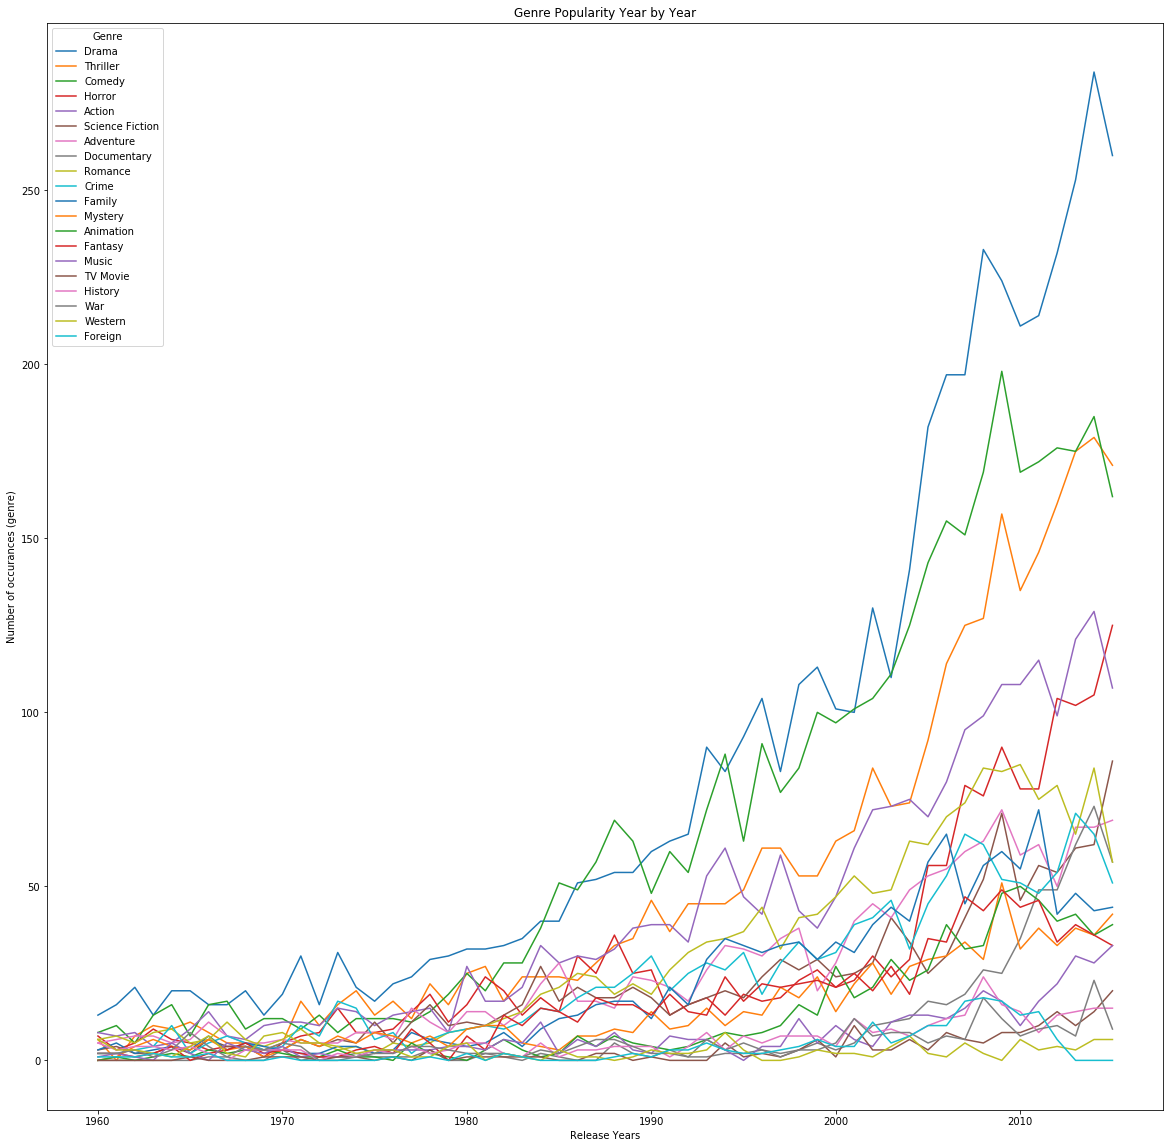

In [129]:
df_genres.plot(figsize = (20,20))
plt.title('Genre Popularity Year by Year')
plt.xlabel('Release Years')
plt.ylabel('Number of occurances (genre)')
plt.legend(title = "Genre");

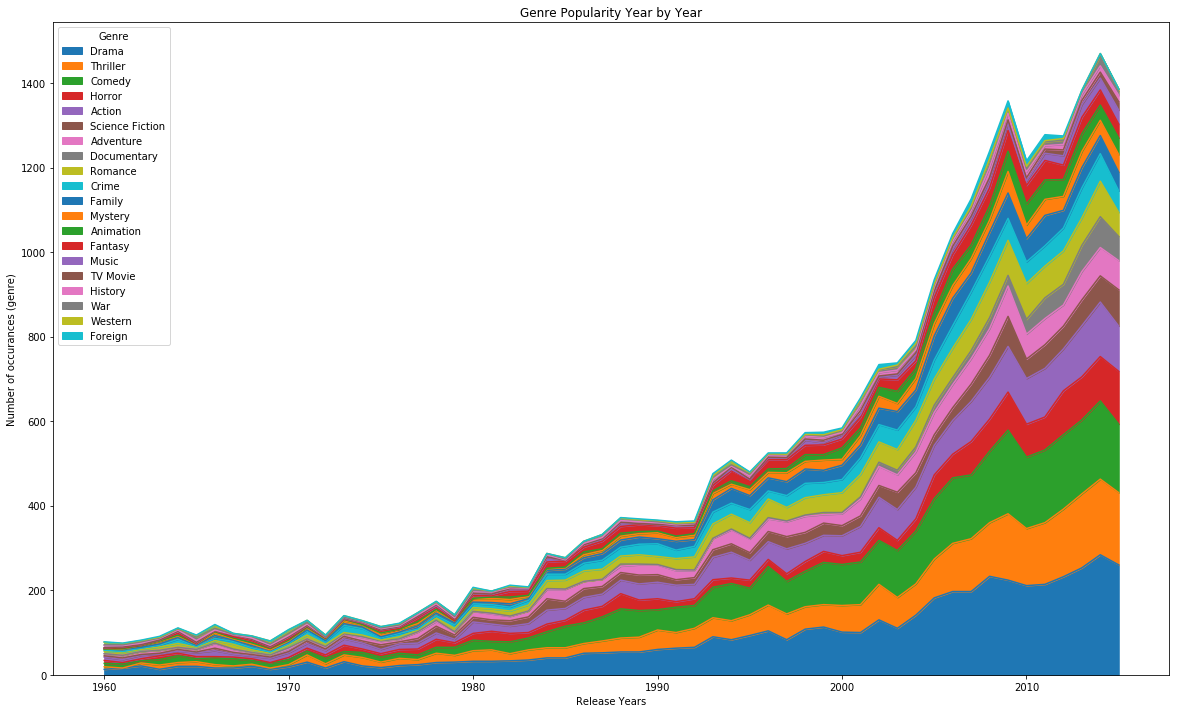

In [130]:
df_genres.plot.area(figsize= (20,12));
plt.title('Genre Popularity Year by Year')
plt.xlabel('Release Years')
plt.ylabel('Number of occurances (genre)')
plt.legend(title = "Genre");

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or 
PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

## Research Question 1 - What movie properties affect movie revenue?

In [134]:
df_num.groupby('revenue_levels').describe()

budget                                                    \
                  count          mean           std       min         25%   
revenue_levels                                                              
Low               673.0  9.732850e+06  1.207898e+07       1.0   2000000.0   
Medium            933.0  2.014129e+07  2.170333e+07   65000.0   7000000.0   
Moderately High  1061.0  3.086560e+07  2.461154e+07  100000.0  14000000.0   
High             1186.0  7.193138e+07  5.380684e+07     113.0  31000000.0   

                                                      budget_adj  \
                        50%          75%          max      count   
revenue_levels                                                     
Low               6000000.0   13000000.0  100000000.0      673.0   
Medium           15000000.0   26000000.0  425000000.0      933.0   
Moderately High  25000000.0   40000000.0  255000000.0     1061.0   
High             60000000.0  100000000.0  380000000.0     1186.0   

                                ...   vote_average      vote_count  \
                         mean   ...            75%  max      count   
revenue_levels                  ...                                  
Low              1.224331e+07   ...            6.6  8.4     1211.0   
Medium           2.713923e+07   ...            6.6  8.4     1212.0   
Moderately High  3.863762e+07   ...            6.7  8.1     1212.0   
High             8.091069e+07   ...            6.9  8.3     1213.0   

                                                                                
                        mean          std   min    25%    50%      75%     max  
revenue_levels                                                                  
Low                86.254335   134.856911  10.0   19.0   42.0    96.00  1777.0  
Medium            148.457921   272.103870  10.0   34.0   72.0   161.25  5754.0  
Moderately High   330.608911   394.223855  10.0  103.0  198.5   403.25  3542.0  
High             1179.156636  1259.137686  10.0  354.0  727.0  1545.00  9767.0  

[4 rows x 72 columns]

For research question 1, what movie properties affect movie revenue, I looked at six variables that could impact revenue: popularity, budget, runtime, vote_count, vote_average and release_year. I used the budget and revenue values that were adjusted for inflation. 

Based on the histograms for runtime, it seems that high revenue movies were between around 90 to 125 minutes long. Any any movies that are significantly less or more will unlikely generate high revenue.

A trend could not really be seen based on release_year, as although the revenue of movies increased in the latter release_years, the number of movies released every year also increased accordingly. Although it does seem that movies in the latter decades are making more in terms of revenue than in the past.

In terms of vote average, many movies were voted between 5 to 7 as a rating, which is likely considered an average movie. It seems most high revenue movies are within this range, with movies being below 5 and after 7 less likely to generate a high revenue.

The histograms for the remaining three variables vote_count, popularity and budget_adj all showed a similar right skewed distribution.

For vote count, although there is more scatter, as the vote_count increases so does revenue. When we narrow the trend for vote_counts below 146 (the 75% margin), there is no clear trend in our data. However after a vote_count of 146, we can see as vote_count increases, the revenue does as well with an increased average revenue.

Similarily popularity shows a trend of increasing revenue as the popularity of a movie increases. After a popularity of 0.7153, there is a large upwards trend in revenue.

Finally the budget of a movie shows a similar trend, with a larger upwards trend after a budget of 2.2e+07.

It should be noted that for all of the variables, although there were segments of the variables that exhibited high revenue counts, there were still many movies that generated lower revenue in the same ranges at higher budgets, popularity, vote counts, etc. Many of these movie properties contribute to being able to obtain a high revenue, but it does not guarantee the movie will make a high revenue. To be able to isolate the movies with high revenues and their properties, a more in-depth investigation between each of the independent variables would likely be required.

In conclusion, there are standard properties that are common among movies that generate higher revenues, including a standard run time of 90 to 125 minute movie and an average movie rating of 5 to 7. A movie is more likely to have a higher revenue with a higher vote count, a higher popularity score and a higher budget.

## Research Question 2  - How has movie genre popularity changed over the years?

For the combined genre plots dataframe, this represents the number of genre occurances. A movie could have had multiple occurances in different genres, so this takes into account all of the genres from each movie (with movies having up to 5 different genres). For simplicity, I split data into counting each occurance of a specific genre listed in all of the movies. 

When comparing the same genre from year to year, it is safe to assume that each count represents one movie, as a movie would not be labelled with the same genre twice. This mean that one movie could be represented in multiple genres. An area plot would be best way to see how the genre counts changed year by year, as each genre is stacked instead of intersecting like it is shown in the line graph. 

The line chart and stacked area plot is good way to easily visualize the larger genres. Since 1960, movies have increased dramatically over the years. It is safe to say that new movies are released every year with an upward trends, but it is clear there are some genres that have become much more popular than others.

The top 5 genres include Drama, Thriller, Comedy, Horror and Action. It is interesting to see that several of these genres have grown steadily over the years, but horror had a larger bloom in the mid 20s. When looking at the most frequent genre per decade between 1960 to 2015, Drama was always the top genre, and by far the most popular genre. It is possible that many of the top genres are also very common combinations of genres. For example Action movies could frequently be Dramas and Thrillers, which could contribute to the high count by association.

The 5 least popular genres includes Foreign, Western, War, History and TV movies. A lot of the lesser known genres are most specifically related to period pieces (History, War or Western) and are less generalized. In general the less specific a genre can be categorized, the more popular it will be.

Regardless of the genre, every genre has seen an upticks in counts, but this is likely in part from the increased in total amount of movies released each year.